In [1]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 61.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-7toeow5m
  Running command git clone --filter=blob:none --quiet https://github.com/py

In [2]:
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.4 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101986 sha256=f5c67383ad5cf52bf8c9ccdb43f91ec2fbe97218a40793f7acfb1f34f1cdb96b
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Un

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import networkx as nx
import torch_geometric.utils as utils
import numpy as np
import torch_geometric
from torch_geometric.data import Data, InMemoryDataset
import torch
import pandas as pd
import ast
from karateclub import GraphWave, Role2Vec, Node2Vec
from networkx.algorithms.centrality import closeness
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from torch.nn import Linear, LeakyReLU
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool, global_max_pool
from torch.nn import LayerNorm
from torch_geometric.loader import DataLoader

In [6]:
graph_df = pd.read_csv("/content/drive/MyDrive/CS286Potika/balanced_dataset_2000_graphs (1).csv")

In [7]:
graph_df

,GraphID,Nodes,Edges,Labels
0,4255,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[43, 0], [0, 43], [43, 1], [1, 43], [43, 2], ...",0
1,343,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[45, 0], [0, 45], [45, 1], [1, 45], [45, 2], ...",0
2,1319,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[43, 0], [0, 43], [43, 1], [1, 43], [43, 2], ...",0
3,2464,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[24, 0], [0, 24], [24, 1], [1, 24], [24, 2], ...",0
4,2068,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[[13, 0], [0, 13], [13, 1], [1, 13], [13, 2], ...",0
...,...,...,...,...
1995,8676,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[18, 0], [0, 18], [18, 1], [1, 18], [18, 2], ...",1
1996,8938,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[41, 0], [0, 41], [41, 1], [1, 41], [41, 2], ...",1
1997,3437,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[27, 0], [0, 27], [27, 1], [1, 27], [27, 2], ...",1
1998,1235,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[23, 0], [0, 23], [23, 1], [1, 23], [23, 2], ...",1


In [8]:
graph_df = graph_df.sample(frac=1)

### Creating graphs with centralities as features


In [9]:
graph_list= []
i=0
for row in graph_df.itertuples():
  if i == 2000:
    break
  ls = ast.literal_eval(row.Edges)
  tuple_list = [(x[0], x[1]) for x in ls]
  node_list = ast.literal_eval(row.Nodes)
  dataset1G = nx.Graph()
  dataset1G.add_edges_from(tuple_list)
  dataset1G.add_nodes_from(node_list)
  closeness = nx.closeness_centrality(dataset1G)
  betweenness = nx.betweenness_centrality(dataset1G)
  closeness_values = list(closeness.values())
  betweenness_values = list(betweenness.values())
  feature_vec = []
  for j in range(0,len(closeness)):
    feature_vec.append([closeness_values[j],betweenness_values[j]])
  x = torch.tensor(feature_vec, dtype = torch.float)
  temp_var = (int(row.Labels))

  dataset1G.graph['y'] = [temp_var]

  Graph_for_dataset = utils.from_networkx(dataset1G)
  Graph_for_dataset.x = x
  graph_list.append(Graph_for_dataset)
  i+=1

### Creating Graphs using Role2vec, GraphWave for feature creation.

In [10]:
model1 = GraphWave()
model2 = Role2Vec(walk_length=20)
model3 = Node2Vec(walk_length=20)


graph_list_2 = []
i=0
for row in graph_df.itertuples():
  if i == 2000:
    break
  ls = ast.literal_eval(row.Edges)
  tuple_list = [(x[0], x[1]) for x in ls]
  node_list = ast.literal_eval(row.Nodes)
  dataset1G = nx.Graph()
  dataset1G.add_edges_from(tuple_list)
  dataset1G.add_nodes_from(node_list)

  model2.fit(dataset1G)
  feature_vec = model2.get_embedding()

  x = torch.tensor(feature_vec, dtype = torch.float)
  temp_var = (int(row.Labels))

  dataset1G.graph['y'] = [temp_var]

  Graph_for_dataset = utils.from_networkx(dataset1G)
  Graph_for_dataset.x = x

  graph_list_2.append(Graph_for_dataset)
  i+=1

Defining the GCN.
(Note:Please change the dimensions in the initial GCNConv layer based on the node feature matrix)

In [17]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12347)
        self.conv1 = GCNConv(128, hidden_channels)
        self.ln1 = LayerNorm(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.ln2 = LayerNorm(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = self.ln1(x)
        x = F.leaky_relu(x)
        x = F.dropout(x, p=0.3, training=self.training)

        x = self.conv2(x, edge_index)
        x = self.ln2(x)
        x = F.leaky_relu(x)
        x = F.dropout(x, p = 0.3, training=self.training)

        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x
        # return F.log_softmax(x, dim=1)

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(128, 64)
  (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (conv2): GCNConv(64, 64)
  (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [12]:
train_dataset = graph_list_2[:1600]
test_dataset = graph_list_2[1600:]

Loading graphs in dataloaders

In [13]:
train_loader = DataLoader(train_dataset, batch_size = 64)
test_loader = DataLoader(test_dataset, batch_size = 64)

In [14]:
for batch in test_loader:
  print(batch)

DataBatch(edge_index=[2, 12832], y=[64], num_nodes=1938, x=[1938, 128], batch=[1938], ptr=[65])
DataBatch(edge_index=[2, 12794], y=[64], num_nodes=1894, x=[1894, 128], batch=[1894], ptr=[65])
DataBatch(edge_index=[2, 12741], y=[64], num_nodes=1927, x=[1927, 128], batch=[1927], ptr=[65])
DataBatch(edge_index=[2, 14148], y=[64], num_nodes=1928, x=[1928, 128], batch=[1928], ptr=[65])
DataBatch(edge_index=[2, 13986], y=[64], num_nodes=1934, x=[1934, 128], batch=[1934], ptr=[65])
DataBatch(edge_index=[2, 15439], y=[64], num_nodes=1993, x=[1993, 128], batch=[1993], ptr=[65])
DataBatch(edge_index=[2, 2317], y=[16], num_nodes=417, x=[417, 128], batch=[417], ptr=[17])


In [18]:
model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.008)
criterion = torch.nn.CrossEntropyLoss()
print(model)

GCN(
  (conv1): GCNConv(128, 64)
  (ln1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (conv2): GCNConv(64, 64)
  (ln2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


Train accuracy : 0.5025, Test accuracy : 0.49
Train accuracy : 0.5025, Test accuracy : 0.49
Train accuracy : 0.505, Test accuracy : 0.49
Train accuracy : 0.506875, Test accuracy : 0.49
Train accuracy : 0.50625, Test accuracy : 0.49
Train accuracy : 0.651875, Test accuracy : 0.6725
Train accuracy : 0.5075, Test accuracy : 0.49
Train accuracy : 0.636875, Test accuracy : 0.615
Train accuracy : 0.504375, Test accuracy : 0.49
Train accuracy : 0.508125, Test accuracy : 0.4925
Train accuracy : 0.63375, Test accuracy : 0.6525
Train accuracy : 0.605, Test accuracy : 0.5975
Train accuracy : 0.631875, Test accuracy : 0.62
Train accuracy : 0.658125, Test accuracy : 0.65
Train accuracy : 0.60875, Test accuracy : 0.6
Train accuracy : 0.618125, Test accuracy : 0.6075
Train accuracy : 0.64, Test accuracy : 0.635
Train accuracy : 0.656875, Test accuracy : 0.6575
Train accuracy : 0.640625, Test accuracy : 0.645
Train accuracy : 0.625625, Test accuracy : 0.6175
Train accuracy : 0.63125, Test accuracy : 0

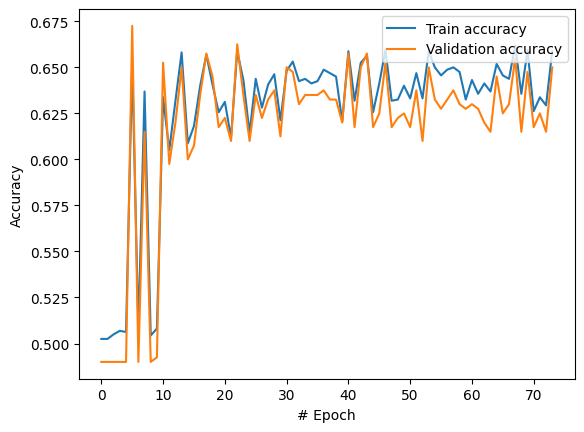

In [19]:
def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.



def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


all_train = []
all_test = []
for epoch in range(1, 75):
    train()
    train_acc = test(train_loader)
    all_train.append(train_acc)
    test_acc = test(test_loader)
    all_test.append(test_acc)
    print(f'Train accuracy : {train_acc}, Test accuracy : {test_acc}')

plt.plot(all_train, label="Train accuracy")
plt.plot(all_test, label="Validation accuracy")
plt.xlabel("# Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

Getting the final predictions from the model

In [20]:
model.eval()
y_pred = []
correct = 0
for data in test_loader:  # Iterate in batches over the training/test dataset.
    out = model(data.x, data.edge_index, data.batch)  
    pred = out.argmax(dim=1)  # Use the class with highest probability.
    y_pred.append(pred)

In [21]:
check = []
for tensor in y_pred:
  tensor = np.array(tensor)
  check = np.concatenate([check,tensor])
original_y = graph_df['Labels'].iloc[1600:]

[[138  58]
 [ 82 122]]


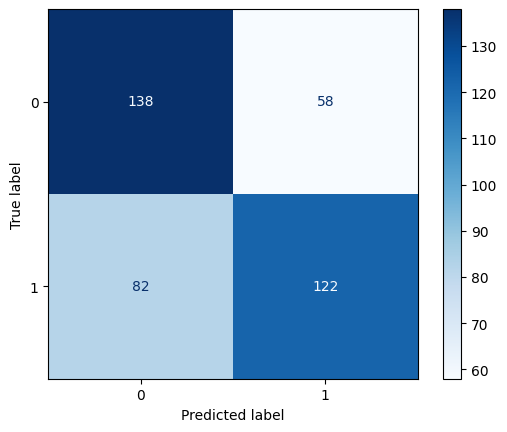

In [22]:
cm = confusion_matrix(original_y.values, check)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

In [23]:
print(classification_report(original_y.values, check))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       196
           1       0.68      0.60      0.64       204

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400

